# basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Global settings for plot display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':12,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })


In [3]:
# Load the basics dataset
df = pd.read_csv('data/basics.csv')
df.head()

,gender,age,batch,avg_internet_usage,usage_type
0,F,21 to 25,Final,4 to 6 hours per day,Online learning
1,M,21 to 25,Final,4 to 6 hours per day,Information gathering for academic purposes
2,M,21 to 25,Final,6 to 8 hours per day,Online learning
3,F,21 to 25,Final,4 to 6 hours per day,Online learning
4,F,21 to 25,Final,4 to 6 hours per day,Lecture videos


In [4]:
# Check the number of rows and columns
df.shape

(194, 5)

That gives us 194 participants and 5 columns. 

In [5]:
# Check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              194 non-null    object
 1   age                 194 non-null    object
 2   batch               194 non-null    object
 3   avg_internet_usage  194 non-null    object
 4   usage_type          194 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


no null values. That's because we had control over the data collection process so the dataset is inherently cleaner than an acquired dataset. 

Let's check out the participant demographics:

### Gender

In [6]:
df['gender'].value_counts()

gender
M    117
F     77
Name: count, dtype: int64

there is a difference in absolute gender numbers. percentages more meaningful for comparison.

In [7]:
df['gender'].value_counts(normalize=True) * 100

gender
M    60.309278
F    39.690722
Name: proportion, dtype: float64

Knowing that the gender ratio is approximately 3:2 (male: female) makes any comparisons more meaningful.

### Age

In [8]:
df['age'].value_counts()

age
18 to 21    129
21 to 25     65
Name: count, dtype: int64

Again there's a disproportion. Let's look at the percentages.

In [9]:
df['age'].value_counts(normalize=True) * 100

age
18 to 21    66.494845
21 to 25    33.505155
Name: proportion, dtype: float64

Age is even more unbalanced (2:1).

### Batch

Batch is the basis for comparisons among two groups included in the study population and will roughly reflect age.

In [10]:
df['batch'].value_counts()

batch
First    139
Final     55
Name: count, dtype: int64

as expected, there is a marked difference between the number of participants from each group. so percentages are more meaningful than absolute numbers. 

In [11]:
df['batch'].value_counts(normalize=True) * 100

batch
First    71.649485
Final    28.350515
Name: proportion, dtype: float64

So you can see that the dataset is inherently disproportionate. any conclusions we draw from the analysis will be affected by this. another fact that shows the importance of being familiar with your dataset is that the total number of students in first year were 250 while in final year were only 150. so 55.6 % of first years participated in the study compared to only 36.6 % of final years. You can similarly draw different conclusions about the same results bc of the difference in participation rate. 

Knowing what data you have is important but knowing what data you don't and why you don't have it might be just as insightful.

Now that we are done with basic demographics, lets move on to the survey questions.

This is where we go into the analysis part which corroborates to the results part of my report. I have reproduced some tables and figures from the report for comparison but there's a lot of new or modified content here. 

## Average daily internet usage (Self reported)

That self reported is important. because actual usage values might differ from the ones reported. 

In [12]:
df['avg_internet_usage'].value_counts()

avg_internet_usage
4 to 6 hours per day         61
2 to 4 hours per day         58
6 to 8 hours per day         30
0 to 2 hours per day         28
more than 8 hours per day    17
Name: count, dtype: int64

So first as a homage to the original report, i'm going to reproduce the R1 table that was based on the responses for this question. 

## R1: Average daily internet usage (combined and batch responses)

In [13]:
r1_table = df.groupby('avg_internet_usage')[['gender', 'batch']].value_counts().unstack(level=[-1, -2]).fillna(0).astype(int)
r1_table

batch,First,Final,First,Final
gender,M,M,F,F
avg_internet_usage,,,,
0 to 2 hours per day,21,4,2,1
2 to 4 hours per day,29,0,22,7
4 to 6 hours per day,26,8,16,11
6 to 8 hours per day,9,7,5,9
more than 8 hours per day,9,4,0,4


In [14]:
r1_table.columns

MultiIndex([('First', 'M'),
            ('Final', 'M'),
            ('First', 'F'),
            ('Final', 'F')],
           names=['batch', 'gender'])

In [15]:
r1_table[('Combined', 'M')] = r1_table[('First', 'M')] + r1_table[('Final', 'M')]
r1_table[('Combined', 'F')] = r1_table[('First', 'F')] + r1_table[('Final', 'F')]
r1_table[('Combined', 'T')] = r1_table[('Combined', 'M')] + r1_table[('Combined', 'F')]
r1_table[('First', 'T')] = r1_table[('First', 'M')] + r1_table[('First', 'F')]
r1_table[('Final', 'T')] = r1_table[('Final', 'M')] + r1_table[('Final', 'F')]
r1_table 

batch                     First Final First Final Combined         First Final
gender                        M     M     F     F        M   F   T     T     T
avg_internet_usage                                                            
0 to 2 hours per day         21     4     2     1       25   3  28    23     5
2 to 4 hours per day         29     0    22     7       29  29  58    51     7
4 to 6 hours per day         26     8    16    11       34  27  61    42    19
6 to 8 hours per day          9     7     5     9       16  14  30    14    16
more than 8 hours per day     9     4     0     4       13   4  17     9     8

In [16]:
for col in r1_table.columns:
    r1_table[(col[0], f'{col[1]} (%)')] = round(r1_table[col] / r1_table[col].sum() * 100, 2)
r1_table 

batch                     First Final First Final Combined         First  \
gender                        M     M     F     F        M   F   T     T   
avg_internet_usage                                                         
0 to 2 hours per day         21     4     2     1       25   3  28    23   
2 to 4 hours per day         29     0    22     7       29  29  58    51   
4 to 6 hours per day         26     8    16    11       34  27  61    42   
6 to 8 hours per day          9     7     5     9       16  14  30    14   
more than 8 hours per day     9     4     0     4       13   4  17     9   

batch                     Final  First  Final  First  Final Combined         \
gender                        T  M (%)  M (%)  F (%)  F (%)    M (%)  F (%)   
avg_internet_usage                                                            
0 to 2 hours per day          5  22.34  17.39   4.44   3.12    21.37   3.90   
2 to 4 hours per day          7  30.85   0.00  48.89  21.88    24.79  37.66   
4 to 6 hours per day         19  27.66  34.78  35.56  34.38    29.06  35.06   
6 to 8 hours per day         16   9.57  30.43  11.11  28.12    13.68  18.18   
more than 8 hours per day     8   9.57  17.39   0.00  12.50    11.11   5.19   

batch                             First  Final  
gender                     T (%)  T (%)  T (%)  
avg_internet_usage                              
0 to 2 hours per day       14.43  16.55   9.09  
2 to 4 hours per day       29.90  36.69  12.73  
4 to 6 hours per day       31.44  30.22  34.55  
6 to 8 hours per day       15.46  10.07  29.09  
more than 8 hours per day   8.76   6.47  14.55

In [17]:
r1_table.loc['Total'] = r1_table.sum()
r1_table 

batch                     First Final First Final Combined               \
gender                        M     M     F     F        M     F      T   
avg_internet_usage                                                        
0 to 2 hours per day       21.0   4.0   2.0   1.0     25.0   3.0   28.0   
2 to 4 hours per day       29.0   0.0  22.0   7.0     29.0  29.0   58.0   
4 to 6 hours per day       26.0   8.0  16.0  11.0     34.0  27.0   61.0   
6 to 8 hours per day        9.0   7.0   5.0   9.0     16.0  14.0   30.0   
more than 8 hours per day   9.0   4.0   0.0   4.0     13.0   4.0   17.0   
Total                      94.0  23.0  45.0  32.0    117.0  77.0  194.0   

batch                      First Final  First  Final   First   Final Combined  \
gender                         T     T  M (%)  M (%)   F (%)   F (%)    M (%)   
avg_internet_usage                                                              
0 to 2 hours per day        23.0   5.0  22.34  17.39    4.44    3.12    21.37   
2 to 4 hours per day        51.0   7.0  30.85   0.00   48.89   21.88    24.79   
4 to 6 hours per day        42.0  19.0  27.66  34.78   35.56   34.38    29.06   
6 to 8 hours per day        14.0  16.0   9.57  30.43   11.11   28.12    13.68   
more than 8 hours per day    9.0   8.0   9.57  17.39    0.00   12.50    11.11   
Total                      139.0  55.0  99.99  99.99  100.00  100.00   100.01   

batch                                     First   Final  
gender                     F (%)  T (%)   T (%)   T (%)  
avg_internet_usage                                       
0 to 2 hours per day        3.90  14.43   16.55    9.09  
2 to 4 hours per day       37.66  29.90   36.69   12.73  
4 to 6 hours per day       35.06  31.44   30.22   34.55  
6 to 8 hours per day       18.18  15.46   10.07   29.09  
more than 8 hours per day   5.19   8.76    6.47   14.55  
Total                      99.99  99.99  100.00  100.01

In [18]:
r1_table = r1_table.sort_index(axis=1, level=[0,1], ascending=[False, True])
r1_table 

batch                     First                                     Final  \
gender                        F   F (%)     M  M (%)      T   T (%)     F   
avg_internet_usage                                                          
0 to 2 hours per day        2.0    4.44  21.0  22.34   23.0   16.55   1.0   
2 to 4 hours per day       22.0   48.89  29.0  30.85   51.0   36.69   7.0   
4 to 6 hours per day       16.0   35.56  26.0  27.66   42.0   30.22  11.0   
6 to 8 hours per day        5.0   11.11   9.0   9.57   14.0   10.07   9.0   
more than 8 hours per day   0.0    0.00   9.0   9.57    9.0    6.47   4.0   
Total                      45.0  100.00  94.0  99.99  139.0  100.00  32.0   

batch                                                        Combined         \
gender                      F (%)     M  M (%)     T   T (%)        F  F (%)   
avg_internet_usage                                                             
0 to 2 hours per day         3.12   4.0  17.39   5.0    9.09      3.0   3.90   
2 to 4 hours per day        21.88   0.0   0.00   7.0   12.73     29.0  37.66   
4 to 6 hours per day        34.38   8.0  34.78  19.0   34.55     27.0  35.06   
6 to 8 hours per day        28.12   7.0  30.43  16.0   29.09     14.0  18.18   
more than 8 hours per day   12.50   4.0  17.39   8.0   14.55      4.0   5.19   
Total                      100.00  23.0  99.99  55.0  100.01     77.0  99.99   

batch                                                   
gender                         M   M (%)      T  T (%)  
avg_internet_usage                                      
0 to 2 hours per day        25.0   21.37   28.0  14.43  
2 to 4 hours per day        29.0   24.79   58.0  29.90  
4 to 6 hours per day        34.0   29.06   61.0  31.44  
6 to 8 hours per day        16.0   13.68   30.0  15.46  
more than 8 hours per day   13.0   11.11   17.0   8.76  
Total                      117.0  100.01  194.0  99.99

The percentages for the 'Total' row in the original report were quite confusing. they were totalling the numbers vertically while the percentages horizontally. i'm well aware that it was my past self who made the table.

Phew! now thats done and gone, i'm going to talk about the data and what we can learn from it. 

So we started with the total value counts. lets sort the index so we can see the trend of numbers from lowest to highest average daily usage:

In [19]:
usage_counts = df['avg_internet_usage'].value_counts().sort_index()
usage_counts

avg_internet_usage
0 to 2 hours per day         28
2 to 4 hours per day         58
4 to 6 hours per day         61
6 to 8 hours per day         30
more than 8 hours per day    17
Name: count, dtype: int64

the trend is pretty easy to see. and because its an easy thing to see just by the numbers, its a great starting opportunity to plot. so what would be the most appropriate type of plot?

It actually depends on what do you want to visualise. here we want to visualise the actual numbers, so the most appropriate plot would be a simple bar chart. because our usage is in increments the progression of bars would easily represent that and the bar height would be a easy to see representation of the numbers. Let's do that then:

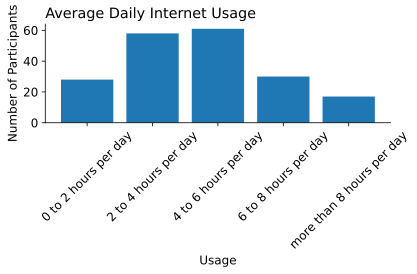

In [20]:
plt.figure(figsize=(6, 4))
plt.bar(usage_counts.index, usage_counts.values)
plt.title('Average Daily Internet Usage')
plt.xlabel('Usage')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Does the job but its a little ugly don't you think? i think we can do better.

In [21]:
usage_counts.index = ['0-2 hrs', '2-4 hrs', '4-6 hrs', '6-8 hrs', '>8 hrs']
usage_counts

0-2 hrs    28
2-4 hrs    58
4-6 hrs    61
6-8 hrs    30
>8 hrs     17
Name: count, dtype: int64

And while we're at it, this format would also look a lot more cleaner in the dataframe itself:

In [22]:
use_map = {'0 to 2 hours per day': '0-2 hrs',
           '2 to 4 hours per day': '2-4 hrs',
           '4 to 6 hours per day': '4-6 hrs',
           '6 to 8 hours per day': '6-8 hrs',
           'more than 8 hours per day': '>8 hrs'}

df['avg_internet_usage'] = df['avg_internet_usage'].map(use_map)

Now lets try again shall we?

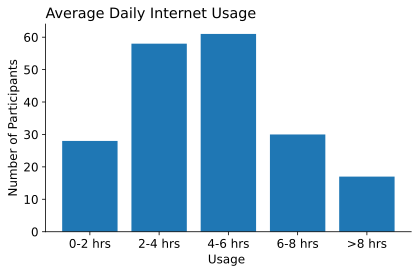

In [23]:
plt.figure(figsize=(6, 4))
plt.bar(usage_counts.index, usage_counts.values)
plt.title('Average Daily Internet Usage')
plt.xlabel('Usage ')
plt.ylabel('Number of Participants')

plt.tight_layout()
plt.show()

Better. but we can't see the exact numbers. We can also make it a bit more pretty.

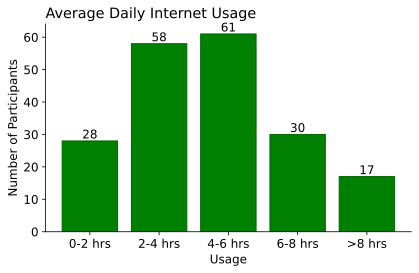

In [24]:
# plot
plt.figure(figsize=(6, 4))
bars = plt.bar(usage_counts.index, usage_counts.values, color='green', edgecolor='darkgreen')

# bar value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height}', ha='center', va='bottom')

# labels etc
plt.title('Average Daily Internet Usage')
plt.xlabel('Usage')
plt.ylabel('Number of Participants')

# adjust layout and show
plt.tight_layout()
plt.show()

A lot better now!

So what kind of bar chart did the report have? well it didn't. not for the total numbers. Instead i used a Pie chart. is that a wrong choice?

NO. a pie chart would be quite useful for this data if i wanted to visualize proportions of the usage categories. but its not very helpful visualising the actual numbers. pie also represents categories as being circular, so while not inappropriate a bar chart is better for numerical progression in categories.

we'll make a pie chart to visualise the proportions then:

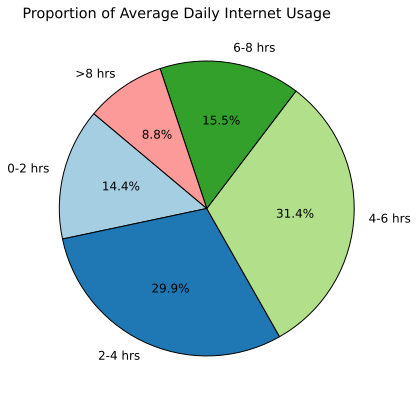

In [25]:
# plot
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(usage_counts, labels=usage_counts.index, 
                        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors,
                        labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))

# title
plt.title('Proportion of Average Daily Internet Usage ')

# adjust layout and show
plt.tight_layout()
plt.show()

Here's the original figure for comparison (yes, its from where you think its from): ![pie chart](images/usage_total.png)

as you can see, pie chart can definitely show numbers but its better to use it for showing proportion because its a *pie* while bar charts are better to compare numbers because of the bar height. 

another minor problem is the progression of the categories in the original bar chart. it was random so we went from 2-4 to > 8 right away.

Now i did use bar charts in the report for this question. how do i use it? in the totally not right way. here's the originals: ![Bar charts for comparison](images/usage_comparison.png)



Can you figure out why its not right? there are several reasons:

- the most obvious thing: the y axis is not on the same scale in the two figures. and as we mentioned previously first years participated in higher numbers so its not meaningful to compare actual numbers between groups. this is where a pie chart comparison would actually have been more meaningful. 

- the x axis labels are not only out of order in terms of numerical progression (4-6 then 2-4 then 6-8) but they also do not match each other. here a grouped bar chart would've been way more appropriate if we wanted to compare actual numbers. 

these are the major issues. a few minor ones are:

- the axis labels aren't the same.

- what is that legend doing there in the first year figure?

- the figure sizes themselves aren't equal. 

so at this point, there's a question: what was i thinking? did i not notice all these problems? actually, i did. i just wasn't proficient enough in coding to make more than a 100 figures and i also wasn't familiar with the basic concepts of visualising data. now that i am, thats kind of why we're here. 

and this is going to be a pattern in our data analysis. i'm going to point out the differences and why what we're doing now makes sense. in the process we'll learn more about how to practially deal with data and how to create better visualisations. the descriptions won't be as verbose but you'll get the point.

So lets do group comparisons in a way that makes sense.

In [26]:
usage_group = df.groupby(['avg_internet_usage', 'batch']).size().unstack()
usage_group

batch,Final,First
avg_internet_usage,,
0-2 hrs,5,23
2-4 hrs,7,51
4-6 hrs,19,42
6-8 hrs,16,14
>8 hrs,8,9


In [27]:
usage_group.index = ['0-2 hrs', '2-4 hrs', '4-6 hrs', '6-8 hrs', '>8 hrs']
usage_group

batch,Final,First
0-2 hrs,5,23
2-4 hrs,7,51
4-6 hrs,19,42
6-8 hrs,16,14
>8 hrs,8,9


Onto the charts:

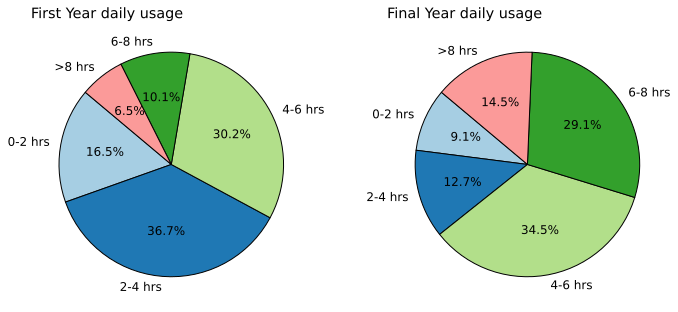

In [28]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (First years)
axs[0].pie(usage_group['First'], labels=usage_group.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('First Year daily usage')

# Second pie (Final years)
axs[1].pie(usage_group['Final'], labels=usage_group.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('Final Year daily usage')

# Adjust layout and show
plt.tight_layout()
plt.show()

Quite better for comparison isn't it? the categories are in circular progression, the colors match for categories and the start angle is consistent. you can easily see that final years have a higher proportion for > 8 hrs usage while first years have the highest in 2-4 hr range. 

if you had gone with the numbers you'd have thought first years are more likely to have a higher daily usage but with proportion that doesn't seem to be true. 

#### chi squared test

I'm putting the appropriate statistical tests with the analysis itself. if this confuses you, you can skip these sections for now. when you're done with the whole analysis part, go check out the stats notebook, go through it then come back and see if this makes sense!

In [29]:
from scipy.stats import chi2_contingency

# create contingency table
table = pd.crosstab(df['batch'], df['avg_internet_usage'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-squared: {chi2}, p-value: {p}, degrees of freedom: {dof}")

Chi-squared: 21.468880098343483, p-value: 0.00025559613999618725, degrees of freedom: 4


We could do the same comparision for genders with just a slight modification in the code:

In [30]:
usage_gender = df.groupby(['avg_internet_usage', 'gender']).size().unstack()
usage_gender.index = ['0-2 hrs', '2-4 hrs', '4-6 hrs', '6-8 hrs', '>8 hrs']
usage_gender

gender,F,M
0-2 hrs,3,25
2-4 hrs,29,29
4-6 hrs,27,34
6-8 hrs,14,16
>8 hrs,4,13


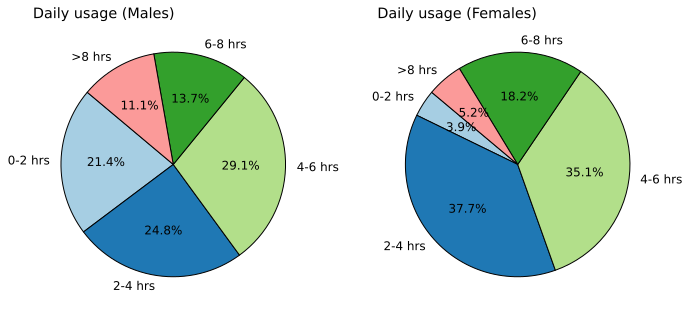

In [31]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (Males)
axs[0].pie(usage_gender['M'], labels=usage_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('Daily usage (Males)')

# Second pie (Females)
axs[1].pie(usage_gender['F'], labels=usage_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('Daily usage (Females)')

# Adjust layout and show
plt.tight_layout()
plt.show()

so now that we're done with plotting, here are the observations about this column from the report: ![Usage Observations](images/usage_observations.png)

Notice how i used percentages for group comparisons and even category proportions in total participants. finally the plots match what i had to look for in the data manually.

Okay, now we can *finally* move on to the next column:

## Usage type

In [32]:
df.head()

,gender,age,batch,avg_internet_usage,usage_type
0,F,21 to 25,Final,4-6 hrs,Online learning
1,M,21 to 25,Final,4-6 hrs,Information gathering for academic purposes
2,M,21 to 25,Final,6-8 hrs,Online learning
3,F,21 to 25,Final,4-6 hrs,Online learning
4,F,21 to 25,Final,4-6 hrs,Lecture videos


In [33]:
df['usage_type'].unique()

array(['Online learning', 'Information gathering for academic purposes',
       'Lecture videos', 'Social media',
       'Streaming services/ Entertainment', 'Communication',
       'Online Gaming', 'Online lecture Marrow', 'Dhruv rathi videos',
       'Marrow and Netflix', 'Browsing', 'Watching videos for study',
       'For academic and social media,  watching series ', 'Study'],
      dtype=object)

In [34]:
usage_dict = {'Lecture videos': 'Online learning',
              'Online Gaming': 'Entertainment',
              'Online lecture Marrow': 'Online learning',
              'Dhruv rathi videos': 'Entertainment',
              'Marrow and Netflix': '>1 category',
              'Watching videos for study': 'Online learning',
              'For academic and social media,  watching series ': '>1 category',
              'Study': 'Online learning',
              'Information gathering for academic purposes': 'Online learning',
              'Streaming services/ Entertainment': 'Entertainment'}

# Replace multiple values with a single value
df['usage_type'] = df['usage_type'].replace(usage_dict)
df['usage_type'].unique()

array(['Online learning', 'Social media', 'Entertainment',
       'Communication', '>1 category', 'Browsing'], dtype=object)

In [35]:
usage_types = df['usage_type'].value_counts()
usage_types

usage_type
Social media       86
Online learning    59
Entertainment      28
Browsing           11
Communication       8
>1 category         2
Name: count, dtype: int64

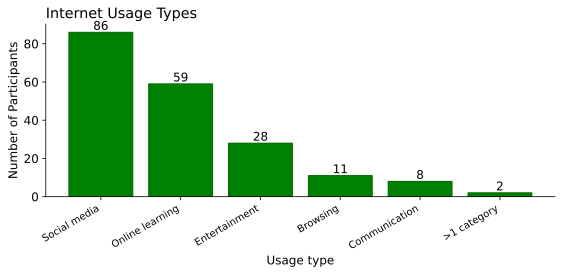

In [36]:
# plot
plt.figure(figsize=(8, 4))
bars = plt.bar(usage_types.index, usage_types.values, color='green', edgecolor='darkgreen')

# bar value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, 
             f'{height}', ha='center', va='bottom')

# labels etc
plt.title('Internet Usage Types')
plt.xlabel('Usage type',)
plt.ylabel('Number of Participants')

# xticks
plt.xticks(rotation=30, ha='right', fontsize=10)

# adjust layout and show
plt.tight_layout()
plt.show()

Compared to the OG pie chart here: ![Usage type pie chart](images/usage_type_total.png)

problems:

- not cleaning the user entered data

- too many slices with a very small proportion

- clipping of the labels

note: the percentages vary because of our value replacement previously.

### group comparisons

Batch

In [37]:
usage_batch = df.groupby(['usage_type', 'batch']).size().unstack()

# Sort by multiple columns (First column first, then Final)
usage_batch = usage_batch.sort_values(['First', 'Final'], ascending=False)
usage_batch

batch,Final,First
usage_type,,
Social media,10,76
Online learning,34,25
Entertainment,6,22
Browsing,1,10
Communication,3,5
>1 category,1,1


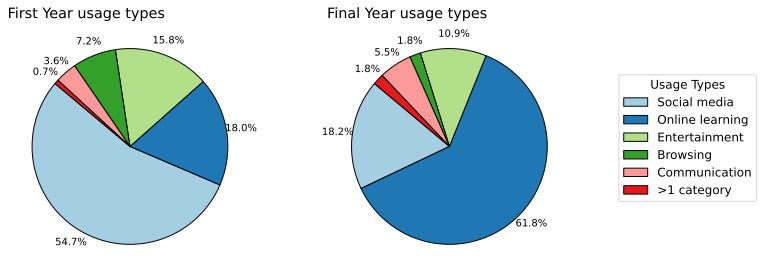

In [38]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# First pie (First years)
wedges1, texts1, autotexts1 = axs[0].pie(usage_batch['First'], autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.15, wedgeprops=dict(linewidth=1, edgecolor='black'),
           pctdistance=1.15, textprops={'fontsize': 10})
axs[0].set_title('First Year usage types')

# Second pie (Final years)
wedges2, texts2, autotexts2 = axs[1].pie(usage_batch['Final'], autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.15, wedgeprops=dict(linewidth=1, edgecolor='black'),
           pctdistance=1.15, textprops={'fontsize': 10})
axs[1].set_title('Final Year usage types')

# add legend
fig.legend(wedges1, usage_batch.index, title='Usage Types', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and show
plt.tight_layout()
plt.show()

Perfect! Better to have the labels as legend so that we don't crowd the figure since some slices are too small to have percentages inside them.

the main thing to notice here is: between groups, social media is more prevalent among first years while online learning is more prevalent among final years. this is something to remember for when we look into iat and qol scores. 

Now want to see the OG comparison charts? i had to laugh at this: ![OG bar chart for comparison](images/usage_type_comparison.png)

Sigh. this is why data cleaning is important, people. Other than the obvious label problem, the y axis is also not on the same scale. and the numbers aren't really comparable. all the same problems as the previous OG comparison charts.

#### chi squared test

In [39]:
# create contingency table
table = pd.crosstab(df['batch'], df['usage_type'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-squared: {chi2}, p-value: {p}, degrees of freedom: {dof}")

Chi-squared: 40.19520324110373, p-value: 1.3639433191838955e-07, degrees of freedom: 5


that p-value gave me a moment of doubt until i noticed the exponent notation. 

Now a group comparison for gender:

In [40]:
usage_gender = df.groupby(['usage_type', 'gender']).size().unstack()
usage_gender = usage_gender.sort_values(['M', 'F'], ascending=False)
usage_gender 

gender,F,M
usage_type,,
Social media,26,60
Online learning,29,30
Entertainment,13,15
Browsing,4,7
Communication,4,4
>1 category,1,1


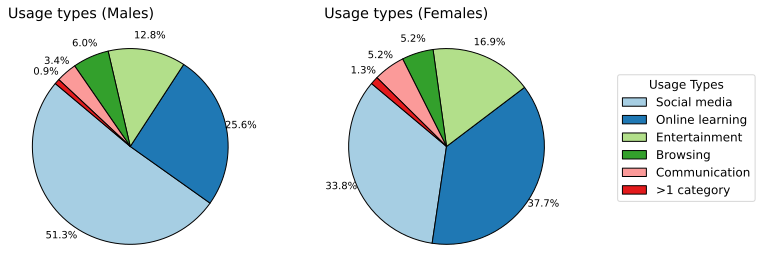

In [41]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# First pie (Males)
wedges1, texts1, autotexts1 = axs[0].pie(usage_gender['M'], autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.15, wedgeprops=dict(linewidth=1, edgecolor='black'),
           pctdistance=1.15, textprops={'fontsize': 10})
axs[0].set_title('Usage types (Males)')

# Second pie (Females)
wedges2, texts2, autotexts2 = axs[1].pie(usage_gender['F'], autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.15, wedgeprops=dict(linewidth=1, edgecolor='black'),
           pctdistance=1.15, textprops={'fontsize': 10})
axs[1].set_title('Usage types (Females)')

# add legend
fig.legend(wedges1, usage_gender.index, title='Usage Types', loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout and show
plt.tight_layout()
plt.show()

one thing you'll notice that just like our batch comparisons: here, social media is most prevalent among male participants while online learning is most prevalent among female participants. we'll see the iat and qol scores of the respective groups to see if we can find some correlations later on.

### One last thing:

In [42]:
# our dataframe now:
df.head()

,gender,age,batch,avg_internet_usage,usage_type
0,F,21 to 25,Final,4-6 hrs,Online learning
1,M,21 to 25,Final,4-6 hrs,Online learning
2,M,21 to 25,Final,6-8 hrs,Online learning
3,F,21 to 25,Final,4-6 hrs,Online learning
4,F,21 to 25,Final,4-6 hrs,Online learning


Data is all cleaned and orderly. let's export this as a csv. why? because we'll need it later.

In [44]:
# remove the comment to save the dataframe as csv file
# df.to_csv('data/final.csv', index=False)